# Principal Component Analysis (PCA)
## Technique for reducing the number of dimensions in the data
Data set begins with 60 dimensions

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
# Read the data using pandas and make a copy
df = pd.read_csv('../datasets/full/2020/survey_results_public.csv', na_values='?', comment = '\t', sep=',', skipinitialspace=True)

data = df.copy()

data = data[data.Country == 'United States']

data

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
4,1094,"I am not primarily a developer, but I write co...",Yes,26.0,18,Yearly,NaN,NaN,United States,United States dollar,...,Easy,Appropriate in length,No,"A business discipline (such as accounting, fin...",NaN,NaN,Somewhat more welcome now than last year,70.0,1,Less than 1 year
7,1245,I am a student who is learning to code,Yes,26.0,25,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,No,"A humanities discipline (such as literature, h...",React.js,Angular.js;jQuery;React.js;Spring,Just as welcome now as I felt last year,NaN,1,Less than 1 year
9,1578,I am a student who is learning to code,No,NaN,23,NaN,NaN,NaN,United States,NaN,...,Easy,NaN,NaN,NaN,NaN,NaN,Just as welcome now as I felt last year,NaN,1,Less than 1 year
11,2603,I am a student who is learning to code,No,53.0,26,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,No,"Another engineering discipline (such as civil,...",ASP.NET;ASP.NET Core;Django;Express;Gatsby;Rea...,Django;Express;Gatsby;React.js,Just as welcome now as I felt last year,NaN,1,Less than 1 year
12,2705,I am a student who is learning to code,Yes,NaN,40,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,NaN,"A business discipline (such as accounting, fin...",NaN,NaN,Just as welcome now as I felt last year,NaN,1,Less than 1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60557,47887,I am a developer by profession,Yes,31.0,13,Yearly,82000.0,82000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",Express;Flask;Vue.js,Vue.js,Somewhat less welcome now than last year,40.0,5,3
60705,17030,I am a developer by profession,No,32.0,NaN,Yearly,80000.0,80000.0,United States,United States dollar,...,Easy,Too long,No,"A social science (such as anthropology, psycho...",NaN,Spring,Just as welcome now as I felt last year,40.0,9,7
60706,59280,I am a developer by profession,Yes,35.0,8,Yearly,78000.0,78000.0,United States,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Angular,Angular,Somewhat more welcome now than last year,39.0,3,Less than 1 year
60707,30555,I am a developer by profession,No,38.0,16,Yearly,75000.0,75000.0,United States,United States dollar,...,Easy,Appropriate in length,No,I never declared a major,React.js;Vue.js,jQuery,Just as welcome now as I felt last year,30.0,22,20


In [5]:
data.drop(['Respondent', 'MainBranch', 'Hobbyist', 'CompFreq', 'CompTotal' , 'Country', 'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange'], axis=1, inplace=True)

In [6]:
data.keys()

Index(['Age', 'Age1stCode', 'ConvertedComp', 'WorkWeekHrs', 'YearsCode',
       'YearsCodePro'],
      dtype='object')

In [7]:
data['Age1stCode'] = data['Age1stCode'].replace(['Less than 1 year', 'Younger than 5 years', 'Older than 85'], ['0', '4', '86'])

In [8]:
data['YearsCode'] = data['YearsCode'].replace(['less than 1 year', 'Less than 1 year', 'More than 50 years'], ['0', '0', '51'])

In [9]:
data['YearsCodePro'] = data['YearsCodePro'].replace(['less than 1 year', 'Less than 1 year', 'More than 50 years'], ['0', '0', '51'])

In [10]:
data.dropna(subset=['ConvertedComp', 'YearsCodePro', 'Age','WorkWeekHrs', 'Age1stCode'], inplace=True)
data.isnull().sum()

Age              0
Age1stCode       0
ConvertedComp    0
WorkWeekHrs      0
YearsCode        0
YearsCodePro     0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [13]:
scaled_data = scaler.transform(data)

In [14]:
scaled_data

array([[-0.04349361,  3.38169559, -0.29357801, -0.22170069, -1.41437902,
        -1.11442496],
       [ 1.27408095,  3.0105807 , -0.51611319, -0.22170069, -1.41437902,
        -1.11442496],
       [-0.04349361,  3.19613815, -0.5468077 ,  1.05494387, -1.41437902,
        -1.11442496],
       ...,
       [ 0.05785828, -1.25724054, -0.69260662, -0.34936515, -1.23039246,
        -1.11442496],
       [ 0.36191395,  0.22721902, -0.73864838, -1.49834525,  0.51747989,
         1.07059025],
       [-0.34754927,  0.22721902, -1.05277598, -0.22170069, -1.04640589,
        -0.78667268]])

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=3)

In [17]:
pca.fit(scaled_data)

PCA(n_components=3)

In [18]:
x_pca = pca.transform(scaled_data)

In [19]:
scaled_data.shape

(7153, 6)

In [20]:
x_pca.shape

(7153, 3)

In [21]:
x_pca

array([[-2.07311557,  2.49431566,  1.71384779],
       [-1.40193556,  2.77131634,  1.56972569],
       [-1.97992083,  1.98908083,  2.61253438],
       ...,
       [-1.30644233, -0.70783412, -0.82861182],
       [ 0.64265586,  1.32657631, -1.37408247],
       [-1.56469489,  0.40734337, -0.12564721]])

Text(0.5, 1.0, 'Dimensionality Reduction: 60 to 3')

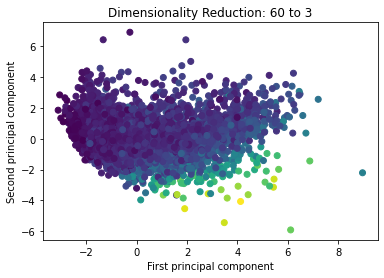

In [22]:
plt.figure()
plt.scatter(x_pca[:,0], x_pca[:,1], c = data['ConvertedComp'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Dimensionality Reduction: 60 to 3')

## K-Means Clustering

In [23]:
# k-means clustering on an x y graph

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
# kmeans = KMeans(n_clusters=8, random_state=0).fit(data)
# kmeans.labels_
data.head()

,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro
100,34.0,33,104000.0,40.0,1,0
101,47.0,31,89500.0,40.0,1,0
102,34.0,32,87500.0,50.0,1,0
103,31.0,10,80000.0,40.0,1,0
104,26.0,25,80000.0,35.0,1,0


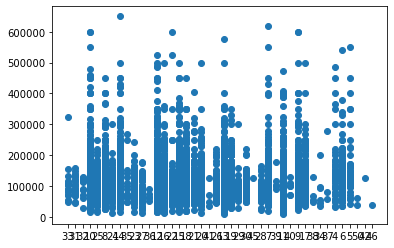

In [27]:
plt.scatter(data.Age1stCode, data.ConvertedComp)

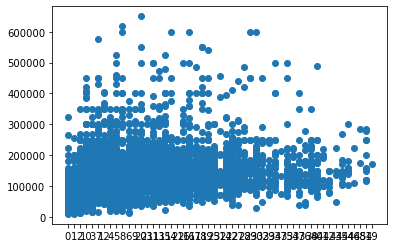

In [28]:
plt.scatter(data.YearsCodePro, data.ConvertedComp)

In [36]:
kmeans = KMeans(n_clusters=4)

In [37]:
y_pred = kmeans.fit_predict(data[['YearsCodePro', 'ConvertedComp']])
y_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [38]:
data['cluster'] = y_pred
data.head()

,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro,cluster
100,34.0,33,104000.0,40.0,1,0,2
101,47.0,31,89500.0,40.0,1,0,2
102,34.0,32,87500.0,50.0,1,0,2
103,31.0,10,80000.0,40.0,1,0,2
104,26.0,25,80000.0,35.0,1,0,2


Text(0, 0.5, 'Converted Compensation')

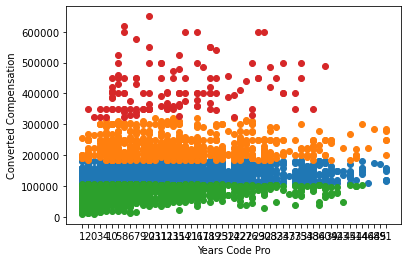

In [42]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
data4 = data[data.cluster==3]
# data5 = data[data.cluster==4]
# data6 = data[data.cluster==5]
# data7 = data[data.cluster==6]
# data8 = data[data.cluster==7]
# data9 = data[data.cluster==8]
# data10 = data[data.cluster==9]

plt.scatter(data1.YearsCodePro, data1.ConvertedComp)
plt.scatter(data2.YearsCodePro, data2.ConvertedComp)
plt.scatter(data3.YearsCodePro, data3.ConvertedComp)
plt.scatter(data4.YearsCodePro, data4.ConvertedComp)

plt.xlabel('Years Code Pro')
plt.ylabel('Converted Compensation')
# plt.legend()

In [45]:
scaler = MinMaxScaler()
scaler.fit(data[['ConvertedComp']])
data[['ConvertedComp']] = scaler.transform(data[['ConvertedComp']])
data

,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro,cluster
100,34.0,33,0.146875,40.0,1,0,2
101,47.0,31,0.124219,40.0,1,0,2
102,34.0,32,0.121094,50.0,1,0,2
103,31.0,10,0.109375,40.0,1,0,2
104,26.0,25,0.109375,35.0,1,0,2
...,...,...,...,...,...,...,...
60359,58.0,15,0.135938,40.0,44,42,2
60557,31.0,13,0.112500,40.0,5,3,2
60706,35.0,8,0.106250,39.0,3,0,2
60707,38.0,16,0.101562,30.0,22,20,2


In [46]:
scaler = MinMaxScaler()
scaler.fit(data[['YearsCodePro']])
data[['YearsCodePro']] = scaler.transform(data[['YearsCodePro']])
data

,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro,cluster
100,34.0,33,0.146875,40.0,1,0.000000,2
101,47.0,31,0.124219,40.0,1,0.000000,2
102,34.0,32,0.121094,50.0,1,0.000000,2
103,31.0,10,0.109375,40.0,1,0.000000,2
104,26.0,25,0.109375,35.0,1,0.000000,2
...,...,...,...,...,...,...,...
60359,58.0,15,0.135938,40.0,44,0.823529,2
60557,31.0,13,0.112500,40.0,5,0.058824,2
60706,35.0,8,0.106250,39.0,3,0.000000,2
60707,38.0,16,0.101562,30.0,22,0.392157,2


In [47]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(data[['YearsCodePro', 'ConvertedComp']])

In [48]:
data['cluster'] = y_pred
data

,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro,cluster
100,34.0,33,0.146875,40.0,1,0.000000,0
101,47.0,31,0.124219,40.0,1,0.000000,0
102,34.0,32,0.121094,50.0,1,0.000000,0
103,31.0,10,0.109375,40.0,1,0.000000,0
104,26.0,25,0.109375,35.0,1,0.000000,0
...,...,...,...,...,...,...,...
60359,58.0,15,0.135938,40.0,44,0.823529,1
60557,31.0,13,0.112500,40.0,5,0.058824,0
60706,35.0,8,0.106250,39.0,3,0.000000,0
60707,38.0,16,0.101562,30.0,22,0.392157,2


In [57]:
kmeans.cluster_centers_

array([[0.08260986, 0.13249098],
       [0.5756042 , 0.23148682],
       [0.27273461, 0.23836626]])

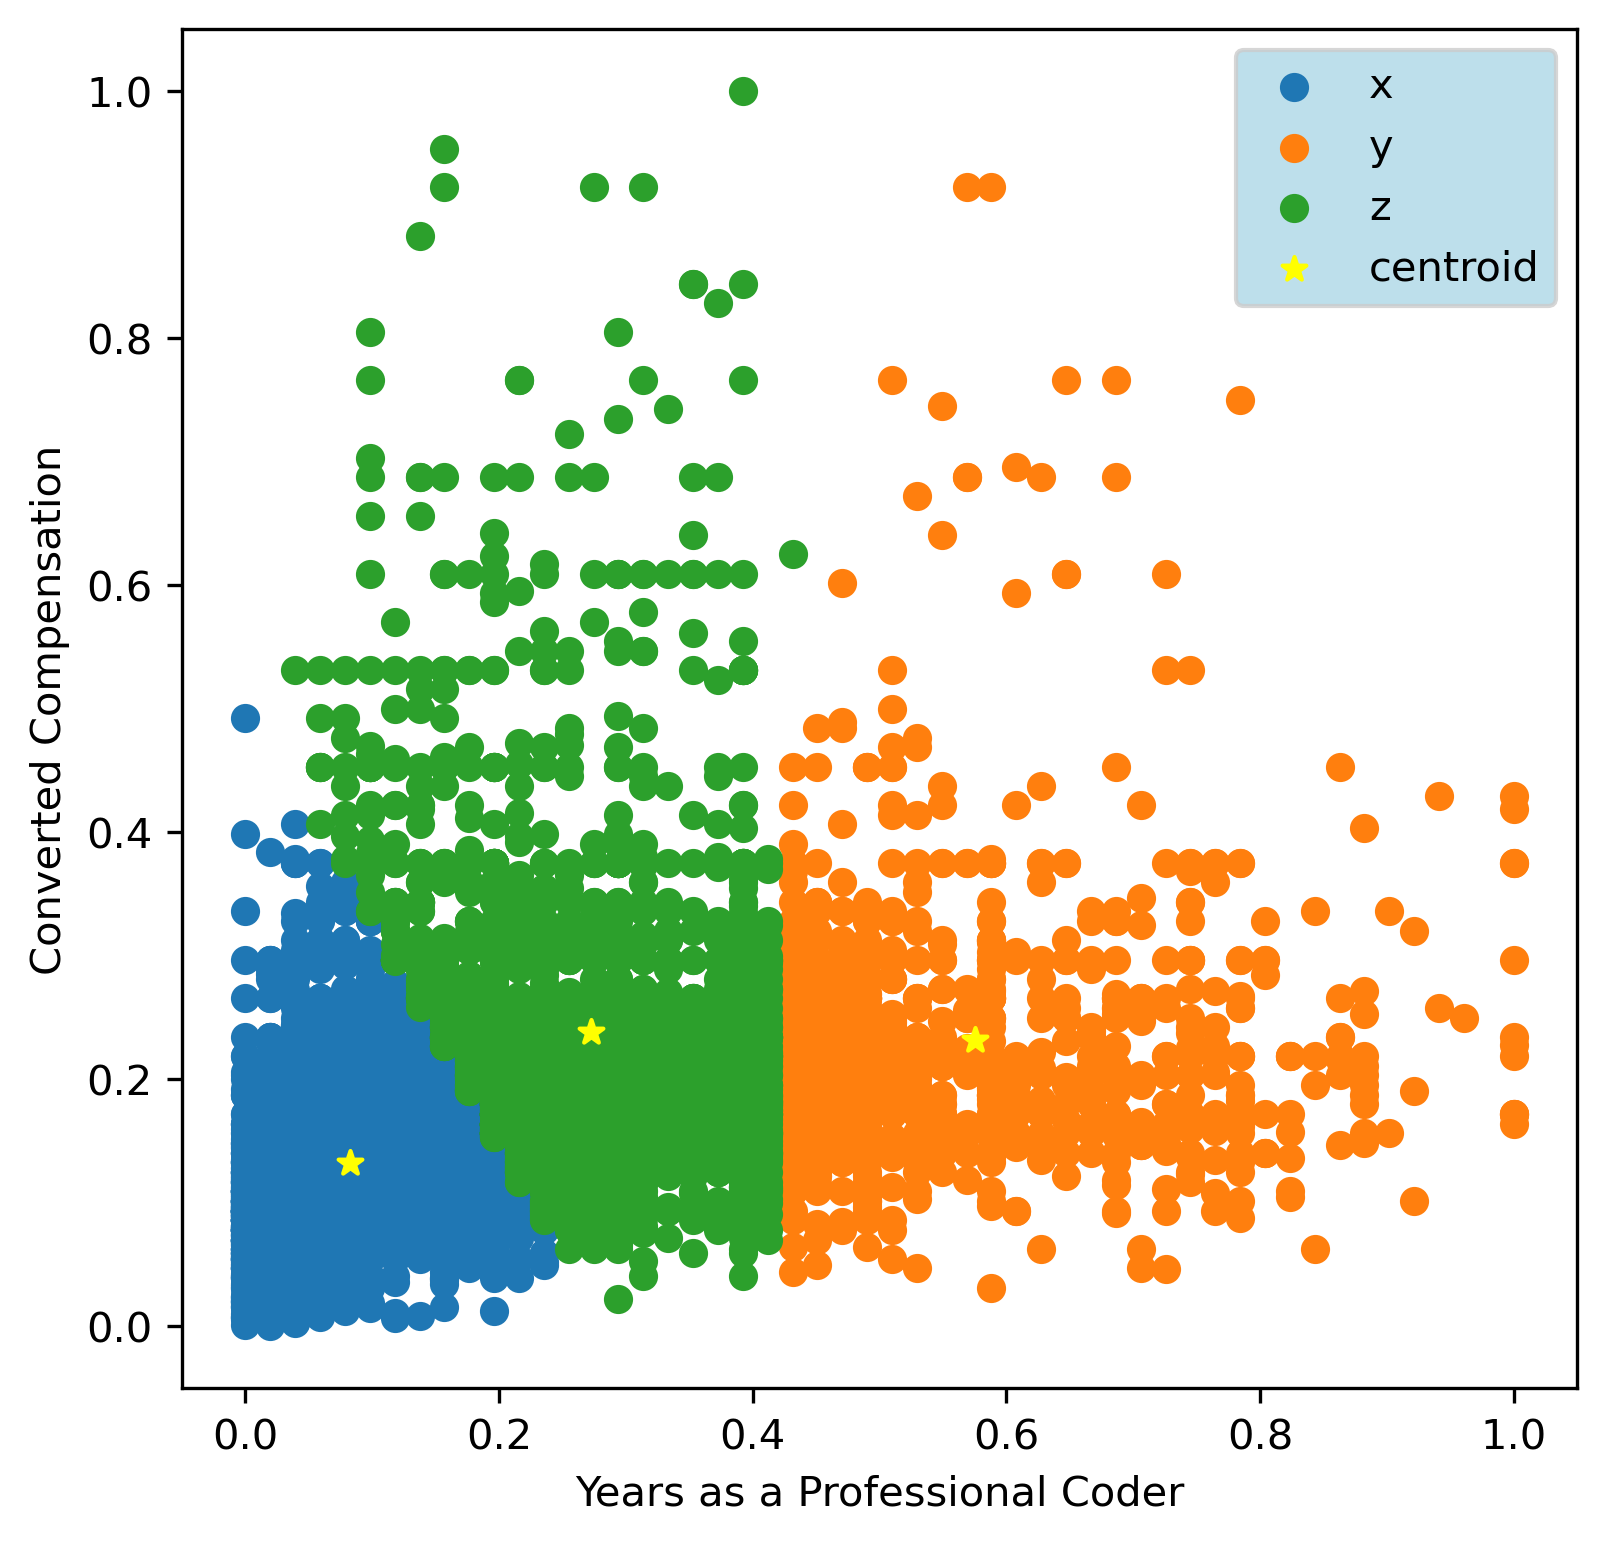

In [71]:
from matplotlib.pyplot import figure
figure(figsize=(6,6), dpi=300)

data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]


plt.scatter(data1.YearsCodePro, data1.ConvertedComp, label='x')
plt.scatter(data2.YearsCodePro, data2.ConvertedComp, label='y')
plt.scatter(data3.YearsCodePro, data3.ConvertedComp, label='z')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='yellow', marker='*', label='centroid')

plt.xlabel('Years as a Professional Coder')
plt.ylabel('Converted Compensation')
plt.legend(facecolor='lightblue')
plt.savefig('k-means-descriptive-analysis.png')